DSC550 Week 7 <br>
Exercise 7.2 <br>
Dimensionality Reduction and Feature Selection <br>
Author Michael Paris <br>
01/25/2022 <br>

- Import the housing data as a data frame and ensure that the data is loaded properly.
- Drop the "Id" column and any features that are missing more than 40% of their values.
- For numerical columns, fill in any missing data with the median value.
- For categorical columns, fill in any missing data with the most common value (mode).
- Convert the categorical columns to dummy variables.
- Split the data into a training and test set, where the SalePrice column is the target.
- Run a linear regression and report the R2-value and RMSE on the test set.
- Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine - Learning with Python Cookbook).
- How many features are in the PCA-transformed matrix?
- Transform but DO NOT fit the test features with the same PCA.
- Repeat step 7 with your PCA transformed data.
- Take your original training features (from step 6) and apply a min-max scaler to them.
- Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).
- Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
- Repeat step 7 with the high variance data.
- Summarize your findings.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [2]:
house_data = pd.read_csv('train.csv')

In [3]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_data.shape

(1460, 81)

In [5]:
# Drop the "Id" column and any features that are missing more than 40% of their values.
house_data.drop('Id', axis=1, inplace=True)
house_data.shape

(1460, 80)

In [6]:
percent_missing = house_data.isnull().sum() * 100 / len(house_data)
missing_value_df = pd.DataFrame({'column_name': house_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 40]
missing_value_df

,column_name,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


In [7]:
house_data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)
house_data.shape


# Mike used this method, i need to work on my lambda function skills
#((housing_df.isnull() | housing_df.isna()).sum() * 100 / housing_df.index.size).round(2).where(lambda x: x> 40).dropna()


(1460, 75)

In [8]:
numeric_list = list(house_data.select_dtypes(include=[np.number]).columns.values)
numeric_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [9]:
# For numerical columns, fill in any missing data with the median value.

#house_data.mean()
numeric_list = list(house_data.select_dtypes(include=[np.number]).columns.values)
#numeric_list
for column in numeric_list:
    house_data[column].fillna(value=house_data[column].mean(), inplace=True)

In [10]:
# For categorical columns, fill in any missing data with the most common value (mode).

object_column_list = list(house_data.select_dtypes(include=['object']).columns)
for column in object_column_list:
    house_data[column].fillna(value=house_data[column].mode(), inplace=True)


In [11]:
# Convert the categorical columns to dummy variables.
#object_column_list
house_data_dummies = pd.get_dummies(house_data, columns=object_column_list)

In [12]:
house_data_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
# Split the data into a training and test set, where the SalePrice column is the target.

#X
X = house_data_dummies.drop(['SalePrice'], axis=1)
#Y
y = house_data_dummies['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
# Run a linear regression and report the R2-value and RMSE on the test set.

regression = LinearRegression()
model = regression.fit(X_train,y_train)

lin_prediction_test = model.predict(X_test)

print('R2 Score against the test set is: ', r2_score(y_test, lin_prediction_test))
print('MSE Score against the test set is: ', mean_squared_error(y_test, lin_prediction_test))

R2 Score against the test set is:  0.7232335411790147
MSE Score against the test set is:  1551355823.0024142


In [15]:
# Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine - Learning with Python Cookbook).
# Transform but DO NOT fit the test features with the same PCA.
sc = StandardScaler()
X_train_features = sc.fit_transform(X_train)
X_test_features = sc.transform(X_test)
pca = PCA(n_components= 0.90)

X_train_features_pca = pca.fit_transform(X_train_features)
X_test_features_pca = pca.transform(X_test_features)

In [16]:
# How many features are in the PCA-transformed matrix?
print(X_train_features.shape)
print(X_test_features_pca.shape)


(1168, 270)
(292, 136)


In [17]:
# Repeat step 7 with your PCA transformed data.

model = regression.fit(X_train_features_pca,y_train)

lin_prediction_test = model.predict(X_test_features_pca)

print('R2 Score against the test set is: ', r2_score(y_test, lin_prediction_test))
print('MSE Score against the test set is: ', mean_squared_error(y_test, lin_prediction_test))

R2 Score against the test set is:  0.8294387723987423
MSE Score against the test set is:  956044871.7118475


In [18]:
# Take your original training features (from step 6) and apply a min-max scaler to them.
minmax = MinMaxScaler()
X_train_features_scaled = minmax.fit_transform(X_train)
X_test_features_scaled = minmax.transform(X_test)


In [19]:
# Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).
thresholder = VarianceThreshold(threshold=0.1)
X_train_high_variance = thresholder.fit_transform(X_train_features_scaled)
X_test_high_variance = thresholder.transform(X_test_features_scaled)
print(X_train_high_variance.shape)
print(X_test_high_variance.shape)

(1168, 50)
(292, 50)


In [20]:
# Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
model = regression.fit(X_train_high_variance,y_train)

lin_prediction_test = model.predict(X_test_high_variance)

print('R2 Score against the test set is: ', r2_score(y_test, lin_prediction_test))
print('MSE Score against the test set is: ', mean_squared_error(y_test, lin_prediction_test))

R2 Score against the test set is:  0.6186707088016731
MSE Score against the test set is:  2137460655.1025195


In [21]:
# Summarize your findings.

### Part 2
- Convert the categorical features (all of them) to dummy variables.
- Split the data into a training and test set.
- Fit a decision tree classifier on the training set.
- Report the accuracy and create a confusion matrix for the model prediction on the test set.
- Create a visualization of the decision tree.
- Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
- Which five features were selected in step 7? Hint: Use the get_support function.
- Repeat steps 4 and 5 with the five best features selected in step 7.
- Summarize your findings.

In [22]:
mushroom_df = pd.read_csv('mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [23]:
# Convert the categorical features (all of them) to dummy variables.
mushroom_dummies_df = pd.get_dummies(mushroom_df)

In [24]:
print(mushroom_df.shape)
print(mushroom_dummies_df.shape)
mushroom_dummies_df.head()

(8124, 23)
(8124, 119)


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
# drop the class_e column as it's not needed..  a 0 in class_p indicates not poisonous
mushroom_dummies_df.drop(['class_e'], axis=1, inplace=True)

In [26]:
# Split the data into a training and test set.

#X
X = mushroom_dummies_df.drop(['class_p'], axis=1)
#Y
y = mushroom_dummies_df['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [27]:
# Fit a decision tree classifier on the training set.
decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X_train, y_train)


In [28]:
# Report the accuracy and create a confusion matrix for the model prediction on the test set.

y_predict = model.predict(X_test)

score = accuracy_score(y_test,y_predict)
print("The model's accuracy is: %.2f " % score)

The model's accuracy is: 1.00 


<function matplotlib.pyplot.show(close=None, block=None)>

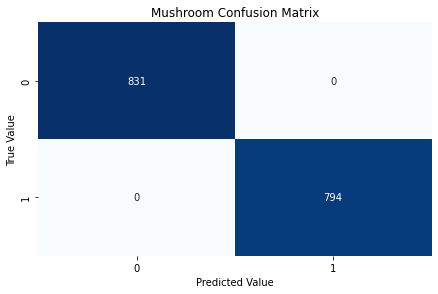

In [29]:
# Create a visualization of the decision tree.

#y_names = y.drop_duplicates()
#y_names = y_names.values.tolist()

matrix = confusion_matrix(y_test, y_predict)
matrix_df = pd.DataFrame(matrix)

sns.heatmap(matrix_df, annot=True, fmt='d', cbar=None, cmap='Blues')
plt.title('Mushroom Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Value'),
plt.xlabel('Predicted Value')
plt.show

[Text(196.94117647058823, 203.85, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3377, 3122]'),
 Text(118.16470588235295, 176.67000000000002, 'X[53] <= 0.5\ngini = 0.287\nsamples = 3661\nvalue = [637, 3024]'),
 Text(78.7764705882353, 149.49, 'X[55] <= 0.5\ngini = 0.133\nsamples = 3223\nvalue = [230, 2993]'),
 Text(59.082352941176474, 122.31, 'X[22] <= 0.5\ngini = 0.05\nsamples = 3072\nvalue = [79, 2993]'),
 Text(39.38823529411765, 95.13, 'X[25] <= 0.5\ngini = 0.025\nsamples = 3031\nvalue = [38, 2993]'),
 Text(19.694117647058825, 67.94999999999999, 'gini = 0.0\nsamples = 2993\nvalue = [0, 2993]'),
 Text(59.082352941176474, 67.94999999999999, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(78.7764705882353, 95.13, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(98.47058823529412, 122.31, 'gini = 0.0\nsamples = 151\nvalue = [151, 0]'),
 Text(157.5529411764706, 149.49, 'X[93] <= 0.5\ngini = 0.132\nsamples = 438\nvalue = [407, 31]'),
 Text(137.85882352941178, 122.31, 'gini = 

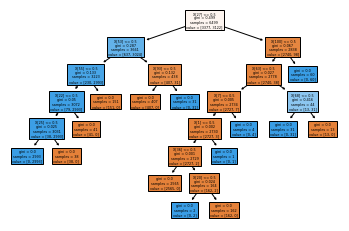

In [30]:
#Create a visualization of the decision tree.

#fig = plt.figure(figsize=(12,10))
tree.plot_tree(model, filled=True)


In [31]:
# Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(X_train, y_train)
print("Best features:", features_kbest.shape)


Best features: (6499, 5)


In [32]:
#Which five features were selected in step 7? Hint: Use the get_support function.
column_names = X_train.columns[chi2_selector.get_support()]
column_names

Index(['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')

In [33]:
mushroom_dummies_df['odor_n']

0       0
1       0
2       0
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: odor_n, Length: 8124, dtype: uint8

In [34]:
#Repeat steps 4 and 5 with the five best features selected in step 7.
#create a new X with just the 5 most important features from above

best_df = mushroom_dummies_df[['class_p','odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k','stalk-surface-below-ring_k']].copy()

X = best_df.drop(['class_p'], axis=1)
#Y
y = best_df['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
model = decisiontree.fit(X_train, y_train)
y_predict = model.predict(X_test)

score = accuracy_score(y_test,y_predict)
print("The model's accuracy is: %.2f " % score)

The model's accuracy is: 0.93 


#### Summarize your findings
- The original decision tree model that utilized the entire dataframe came back with a perfect score.
- The second model utilizing just the best 5 columns reduced the model's accuracy to 93%.  
- Interesting that just the top 5 features were able to correctly predict the target feature 93% of the time.
- By reducing the number of features in our dataset, we've reduced the complexity of the dataset and in the case of larger sets, we would benefit with shorter run times and a reduction in the risk of the model over-fitting our data.